# Predicting disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting someone's disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features & Modelling
5. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict it's disease ?

## 2. Data

We are using Dataset from Kaggle : https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## 3. Evaluation

> If we can reach 95% accuracy at predicting patient's disease during the proof of concept, we'll pursue the project.

## 4. Features & Modelling

In our dataset, there are 133 Columns and 132 of these columns are symptoms that a person experiences and last column is the prognosis. We will use these features to train our model.

## 5. Experimentation

At last, we do experiments on models and pick the best one.

In [4]:
# Standard Imports
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [5]:
# Loading Training set
df = pd.read_csv("training.csv")
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
# Checking the size of the data
df.shape

(4920, 134)

In [7]:
# Dropping unncessary column
df.drop('Unnamed: 133', axis=1, inplace=True)
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [8]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
# All diseases count
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

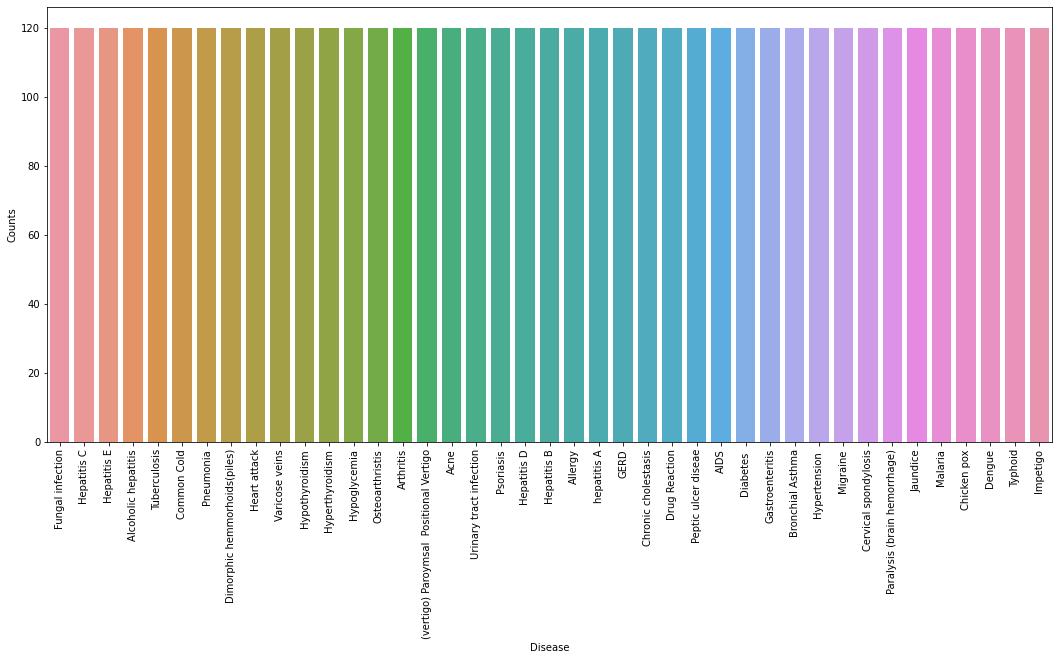

In [10]:
# Checking whether the dataset is balanced or not
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
# Encoding the target value into numerical
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [12]:
df["prognosis"]

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [13]:
# Spliting data into training and test data
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [14]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [16]:
X.shape, y.shape

((4920, 132), (4920,))

Text(0.5, 0, '0 = No Disease, 1 = Disease')

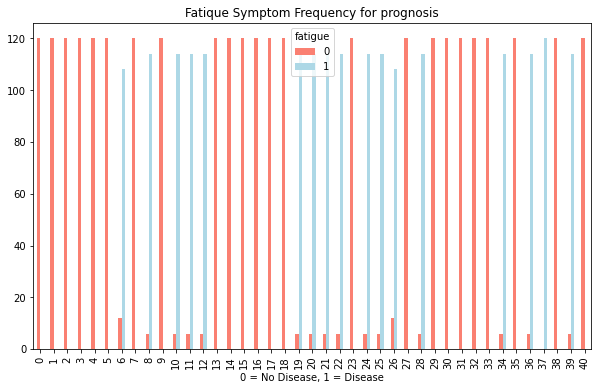

In [17]:
# Let's Check Fatique and prognosis relationship
pd.crosstab(df.prognosis, df.fatigue).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title('Fatique Symptom Frequency for prognosis')
plt.xlabel('0 = No Disease, 1 = Disease')

In [18]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Testing Models

## 1. Decession Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
tree_model = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X = df.drop('prognosis', axis = 1)
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
acc = tree_model.score(X_test, y_test)
scores = cross_val_score(tree_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

Scores: 1.0
Acurray on test set: 100.00%


## 2. Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
acc = rf_model.score(X_test, y_test)
scores = cross_val_score(rf_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

Scores: 1.0
Acurray on test set: 100.00%


## 3. Support Vector Classification

In [21]:
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(X_train, y_train)
pred = svc_model.predict(X_test)
acc = svc_model.score(X_test, y_test)
scores = cross_val_score(svc_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

Scores: 1.0
Acurray on test set: 100.00%


## 4. KNN (k-nearest neighbors)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
acc = knn_model.score(X_test, y_test)
scores = cross_val_score(knn_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

Scores: 1.0
Acurray on test set: 100.00%


## 5. Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train,y_train)
pred = nb_model.predict(X_test)
acc = nb_model.score(X_test, y_test)
scores = cross_val_score(nb_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

Scores: 1.0
Acurray on test set: 100.00%


## 6. Gradient Boost

In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
acc = xgb_model.score(X_test, y_test)
scores = cross_val_score(xgb_model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)

print(f"Scores: {scores.mean()}")
print("Acurray on test set: {:.2f}%".format(acc*100))

C:\Users\Diksh\sample_project_1\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Diksh\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Diksh\sample_project_1\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (p

[23:52:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scores: 1.0
Acurray on test set: 100.00%


## Testing on Custom Input3

In [25]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it, into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
    svc_prediction = data_dict["predictions_classes"][svc_model.predict(input_data)[0]]
    tree_prediction = data_dict["predictions_classes"][tree_model.predict(input_data)[0]]
    knn_prediction = data_dict["predictions_classes"][knn_model.predict(input_data)[0]]
    xgb_prediction = data_dict["predictions_classes"][xgb_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svc_prediction, tree_prediction, knn_prediction, xgb_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svc_model_prediction": svc_prediction,
        "decision_tree_prediciton": tree_prediction,
        "knn_prediction": knn_prediction,
        "xgb_prediction": xgb_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Fast Heart Rate,Sweating"))
# print(predictDisease("Itching"))

{'rf_model_prediction': 'Heart attack', 'naive_bayes_prediction': 'Heart attack', 'svc_model_prediction': 'Heart attack', 'decision_tree_prediciton': 'Heart attack', 'knn_prediction': 'Heart attack', 'xgb_prediction': 'Heart attack', 'final_prediction': 'Heart attack'}


C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Saving Models

In [ ]:
import pickle

# Saving model via pickle module
pickle.dump(tree, open('final_working/d_tree.pkl', 'wb'))
pickle.dump(rf_model, open('final_working/rf_model.pkl', "wb"))
pickle.dump(svc_model, open('final_working/svc_model.pkl', "wb"))
pickle.dump(knn_model, open('final_working/knn_model.pkl', "wb"))
pickle.dump(nb_model, open('final_working/nb_model.pkl', "wb"))
pickle.dump(xgb_model, open('final_working/xgb_model.pkl', "wb"))